In [ ]:
# libraries to help with dataframe manipulation
import pandas as pd
import numpy as np
# library to help with text formatting
from termcolor import colored

In [ ]:
pip install pycountry_convert

In [ ]:
# library to help get the continent where a country belongs
import pycountry_convert as pc

**DATA VIEWING**

In [ ]:
# calling in the dataframe
df = pd.read_csv('survey.csv')

# New Section

In [ ]:
def unique_values_column(df, col):
    # a function to get unique value count of each item in a dataframe's column

    # getting the column's unique values
    UVList = df[col].unique()

    # counting the each unique value
    UVCountList = [(df[col] == i).sum() for i in df[col].unique()]

    # creating the unique value count table
    global UVTable
    cols = df.columns
    print('Column :', col)
    print('Unique value count :', len(UVList))
    UVTable = pd.DataFrame({'Unique Value': UVList,
                            'Count': UVCountList})
    display(UVTable)

In [ ]:
def item_count_perc(df, col):
    # a function to display how much percentage each non-NaN unique value makes up for in a categorical feature

    # storing the unique value of the dataframe's feature in a list
    listUV = df[col].unique()
    listUV = [i for i in listUV if type(i) is not float]

    # storing the count of each unique value in a list
    listUVCount = [(df[col] == i).sum() for i in listUV]

    # calculating the probability of each unique value and storing them in a list
    listUVProb = [i / sum(listUVCount) for i in listUVCount]

    # displaying the report in a table
    global table
    table = pd.DataFrame({col: listUV,
                          'Count': listUVCount,
                          'Percentage': listUVProb})\
            .sort_values(['Count', col], ascending = [0, 1])\
            .reset_index(drop = True)
    print('Count of each Unique Value in', col, 'Feature')
    display(table)

In [ ]:
# taking a quick look at the dataframe
print('df rows x cols :', df.shape)
display(df.head())
print('\n')
display(df.info())

df rows x cols : (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellne

None

In [ ]:
# storing all the features and their descriptions in a variable
RawFeatures = '''Timestamp;
Age;
Gender;
Country;
state: If you live in the United States,which state or territory do you live in?;
self_employed: Are you self-employed?;
family_history: Do you have a family history of mental illness?;
treatment: Have you sought treatment for a mental health condition?;
work_interfere: If you have a mental health condition,do you feel that it interferes with your work?;
no_employees: How many employees does your company or organization have?;
remote_work: Do you work remotely (outside of an office) at least 50% of the time?;
tech_company: Is your employer primarily a tech company/organization?;
benefits: Does your employer provide mental health benefits?;
care_options: Do you know the options for mental health care your employer provides?;
wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?;
seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?;
anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?;
leave: How easy is it for you to take medical leave for a mental health condition?;
mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?;
physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?;
coworkers: Would you be willing to discuss a mental health issue with your coworkers?;
supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?;
mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?;
physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?;
mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?;
obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?;
comments: Any additional notes or comments'''

# splitting each feature into a separate item in a list
Features = RawFeatures.split(';')

# omitting unnecessary characters that arose from the previous step
Features = [i.replace('\n', '') for i in Features]

# separating each feature and its description into two separate lists
ListFeature = []
ListDesc = []
for i in Features:
    part1 = i.partition(':')[0]
    part2 = i.partition(':')[2]
    ListFeature.append(part1)
    ListDesc.append(part2)

# creating the description dataframe
FeaturesTable = pd.DataFrame({'Feature': ListFeature,
                              'Description': ListDesc})

# setting the display option so that the Description column width is displayed in full width
pd.set_option("display.max_colwidth", 0)

# displaying the description dataframe
print('Description of each Feature')
FeaturesTable

Description of each Feature


,Feature,Description
0,Timestamp,
1,Age,
2,Gender,
3,Country,
4,state,"If you live in the United States,which state or territory do you live in?"
5,self_employed,Are you self-employed?
6,family_history,Do you have a family history of mental illness?
7,treatment,Have you sought treatment for a mental health condition?
8,work_interfere,"If you have a mental health condition,do you feel that it interferes with your work?"
9,no_employees,How many employees does your company or organization have?


In [ ]:
# counting any missing values present in df's features
MVTable = pd.DataFrame(df.isnull().sum())\
          .reset_index()\
          .rename(columns = {'index': 'Column',
                             0: 'Count'})

# calculating the missing values percentage for each feature
MVTable = MVTable.assign(Percentage = lambda x: x['Count'] / len(df) * 100)
MVTable['Percentage'] = [round(item, 2) for item in MVTable['Percentage']]
MVTable = MVTable.rename(columns = {'Percentage': 'Percentage (%)'})

# displaying only the features with missing values
display(MVTable[MVTable['Count'] > 0])

,Column,Count,Percentage (%)
4,state,515,40.91
5,self_employed,18,1.43
8,work_interfere,264,20.97
26,comments,1095,86.97


In [ ]:
# spotting if there are any duplicated entries in df
duplicates = df.duplicated().sum()
print('Duplicated entries : ' + str(duplicates))

Duplicated entries : 0


In [ ]:
# storing the feature names of the dataframe
cols = df.columns

# calculating the unique value count in each column and storing them a list
listUVCount = [len(df[col].unique()) for col in df.columns]

# creating the report table for unique value count
table = pd.DataFrame({'Feature': cols,
                      'Count of Unique Value': listUVCount})

# displaying the report table
print('Unique value count in each column :')
display(table)

Unique value count in each column :


,Feature,Count of Unique Value
0,Timestamp,1246
1,Age,53
2,Gender,49
3,Country,48
4,state,46
5,self_employed,3
6,family_history,2
7,treatment,2
8,work_interfere,5
9,no_employees,6


In [ ]:
# Age feature range
Min = min(df['Age'])
Max = max(df['Age'])

# count of entries with Age value below 18
LowerOutlier = (df['Age'] < 18).sum()

# count of entries with Age value above 80
UpperOutlier = (df['Age'] > 80).sum()

# count of entries with outlier Age value
OutlierCount = LowerOutlier + UpperOutlier

# percentage of entries with outlier Age value
OutlierCountPerc = OutlierCount / len(df)
OutlierCountPerc = '{:.2f}%'.format(OutlierCountPerc * 100)

# displaying the Age outlier report
print('Lowest Age in the entries                    : ' + str(Min))
print('Highest Age in the entries                   : ' + str(Max))
print('People younger than 18                       : ' + str(LowerOutlier) + ' people')
print('People older than 80                         : ' + str(UpperOutlier) + ' people')
print('Count of entries with outlier Age value      : ' + str(OutlierCount))
print('Percentage of entries with outlier Age value : ' + str(OutlierCountPerc))

Lowest Age in the entries                    : -1726
Highest Age in the entries                   : 99999999999
People younger than 18                       : 6 people
People older than 80                         : 2 people
Count of entries with outlier Age value      : 8
Percentage of entries with outlier Age value : 0.64%


In [ ]:
# getting the unique value count report
unique_values_column(df, 'Gender')

Column : Gender
Unique value count : 49


,Unique Value,Count
0,Female,121
1,M,116
2,Male,615
3,male,206
4,female,62
5,m,34
6,Male-ish,1
7,maile,1
8,Trans-female,1
9,Cis Female,1


In [ ]:
# getting the unique value count report
unique_values_column(df, 'Country')

Column : Country
Unique value count : 48


,Unique Value,Count
0,United States,751
1,Canada,72
2,United Kingdom,185
3,Bulgaria,4
4,France,13
5,Portugal,2
6,Netherlands,27
7,Switzerland,7
8,Poland,7
9,Australia,21


In [ ]:
# getting the unique value count report
unique_values_column(df, 'state')

Column : state
Unique value count : 46


,Unique Value,Count
0,IL,29
1,IN,27
2,NaN,0
3,TX,44
4,TN,45
5,MI,22
6,OH,30
7,CA,138
8,CT,4
9,MD,8


In [ ]:
# counting how many entries are outside of US
NotUS = (df['Country'] != 'United States').sum()

# counting how many entries outside of US that have missing value in their State feature
NotUSEmptyState = df[df['Country'] != 'United States']['state'].isnull().sum()

# counting how many entries are inside of US
US = (df['Country'] == 'United States').sum()

# counting how many entries inside of US that have missing value in their State feature
USEmptyState = df[df['Country'] == 'United States']['state'].isnull().sum()

# Total entries with empty state
NullState = df['state'].isnull().sum()

# Displaying the report
print('Entries outside of US')
print('Count of entries that are outside of US :', NotUS)
print('Count of entries outside of US with missing value in their State feature :', NotUSEmptyState, '\n')
print('Entries inside of US')
print('Count of entries that are inside of US :', US)
print('Count of entries inside of US with missing value in their State feature :', USEmptyState)

Entries outside of US
Count of entries that are outside of US : 508
Count of entries outside of US with missing value in their State feature : 504 

Entries inside of US
Count of entries that are inside of US : 751
Count of entries inside of US with missing value in their State feature : 11


In [ ]:
# calculating the percentage of entries inside of US that have missing value in their State feature
print("Entries inside US that have missing value in their State feature :")
USNullStatePerc = df[df['Country'] == 'United States']['state'].isnull().sum() / len(df)
USNullStatePerc = '{:.2f}%'.format(USNullStatePerc * 100)
print(USNullStatePerc, 'of the total entries in the dataframe')

Entries inside US that have missing value in their State feature :
0.87% of the total entries in the dataframe


In [ ]:
# getting the unique State value of entries outside of US
UniqueStateOutsideUS = list(df[df['Country'] != 'United States']['state'].unique())
UniqueStateOutsideUS = [i for i in UniqueStateOutsideUS if type(i) is not float]
print('Unique State value of entries outside of US :')
UniqueStateOutsideUS

Unique State value of entries outside of US :


['NY', 'MD', 'IL', 'UT']

In [ ]:
# locating Country feature value of entries outside of US that have a value in their State feature
print('Countries outside of US that have a value in their State feature')
df[df['Country'] != 'United States']\
[['Country', 'state']]\
.loc[df['state'].isin(UniqueStateOutsideUS)]

Countries outside of US that have a value in their State feature


,Country,state
319,Latvia,NY
488,Israel,MD
989,"Bahamas, The",IL
1179,Bulgaria,UT


In [ ]:
# getting the unique value count report
unique_values_column(df, 'self_employed')

Column : self_employed
Unique value count : 3


,Unique Value,Count
0,NaN,0
1,Yes,146
2,No,1095


In [ ]:
# getting the unique value count report
unique_values_column(df, 'family_history')

Column : family_history
Unique value count : 2


,Unique Value,Count
0,No,767
1,Yes,492


In [ ]:
# getting the unique value count report
unique_values_column(df, 'treatment')

Column : treatment
Unique value count : 2


,Unique Value,Count
0,Yes,637
1,No,622


In [ ]:
# getting the unique value count report
unique_values_column(df, 'work_interfere')

Column : work_interfere
Unique value count : 5


,Unique Value,Count
0,Often,144
1,Rarely,173
2,Never,213
3,Sometimes,465
4,NaN,0


In [ ]:
# getting the unique value count report
unique_values_column(df, 'no_employees')

Column : no_employees
Unique value count : 6


,Unique Value,Count
0,6-25,290
1,More than 1000,282
2,26-100,289
3,100-500,176
4,1-5,162
5,500-1000,60


In [ ]:
# getting the unique value count report
unique_values_column(df, 'remote_work')

Column : remote_work
Unique value count : 2


,Unique Value,Count
0,No,883
1,Yes,376


In [ ]:
# getting the unique value count report
unique_values_column(df, 'tech_company')

Column : tech_company
Unique value count : 2


,Unique Value,Count
0,Yes,1031
1,No,228


In [ ]:
# getting the unique value count report
unique_values_column(df, 'benefits')

Column : benefits
Unique value count : 3


,Unique Value,Count
0,Yes,477
1,Don't know,408
2,No,374


In [ ]:
# getting the unique value count report
unique_values_column(df, 'care_options')

Column : care_options
Unique value count : 3


,Unique Value,Count
0,Not sure,314
1,No,501
2,Yes,444


In [ ]:
# getting the unique value count report
unique_values_column(df, 'wellness_program')

Column : wellness_program
Unique value count : 3


,Unique Value,Count
0,No,842
1,Don't know,188
2,Yes,229


In [ ]:
# getting the unique value count report
unique_values_column(df, 'seek_help')

Column : seek_help
Unique value count : 3


,Unique Value,Count
0,Yes,250
1,Don't know,363
2,No,646


In [ ]:
# getting the unique value count report
unique_values_column(df, 'anonymity')

Column : anonymity
Unique value count : 3


,Unique Value,Count
0,Yes,375
1,Don't know,819
2,No,65


In [ ]:
# getting the unique value count report
unique_values_column(df, 'leave')

Column : leave
Unique value count : 5


,Unique Value,Count
0,Somewhat easy,266
1,Don't know,563
2,Somewhat difficult,126
3,Very difficult,98
4,Very easy,206


In [ ]:
# getting the unique value count report
unique_values_column(df, 'mental_health_consequence')

Column : mental_health_consequence
Unique value count : 3


,Unique Value,Count
0,No,490
1,Maybe,477
2,Yes,292


In [ ]:
# getting the unique value count report
unique_values_column(df, 'phys_health_consequence')

Column : phys_health_consequence
Unique value count : 3


,Unique Value,Count
0,No,925
1,Yes,61
2,Maybe,273


In [ ]:
# getting the unique value count report
unique_values_column(df, 'coworkers')

Column : coworkers
Unique value count : 3


,Unique Value,Count
0,Some of them,774
1,No,260
2,Yes,225


In [ ]:
# getting the unique value count report
unique_values_column(df, 'supervisor')

Column : supervisor
Unique value count : 3


,Unique Value,Count
0,Yes,516
1,No,393
2,Some of them,350


In [ ]:
# getting the unique value count report
unique_values_column(df, 'mental_health_interview')

Column : mental_health_interview
Unique value count : 3


,Unique Value,Count
0,No,1008
1,Yes,44
2,Maybe,207


In [ ]:
# getting the unique value count report
unique_values_column(df, 'phys_health_interview')

Column : phys_health_interview
Unique value count : 3


,Unique Value,Count
0,Maybe,557
1,No,500
2,Yes,202


In [ ]:
# getting the unique value count report
unique_values_column(df, 'mental_vs_physical')

Column : mental_vs_physical
Unique value count : 3


,Unique Value,Count
0,Yes,343
1,Don't know,576
2,No,340


In [ ]:
# getting the unique value count report
unique_values_column(df, 'obs_consequence')

Column : obs_consequence
Unique value count : 2


,Unique Value,Count
0,No,1075
1,Yes,184


**DATA CLEANING AND ENGINEERING**

In [ ]:
# checking if there are any duplicated entries after
duplicated = df.duplicated().sum()
print('Count of duplicated entries in the dataframe :', duplicated)

Count of duplicated entries in the dataframe : 0


In [ ]:
# dropping the duplicated entries
df = df.drop_duplicates()\
     .reset_index(drop = True)

AGE column

we are going to clean the Age feature off its outlier values. Instead of dropping the entries, we will first try to replace them with other logical value. One of the options is to replace the outliers with the feature's median value. Let's check the median value of Age feature.

In [ ]:
# getting the median of Age feature
AgeMedian = df['Age'].median()
print('Median of Age feature :', AgeMedian)

Median of Age feature : 31.0


In [ ]:
# replacing the Age outliers with Age feature's median value
df['Age'].mask((df['Age'] < 18) | (df['Age'] > 80),
               AgeMedian,
               inplace = True)

In [ ]:
# Age feature range
Min = min(df['Age'])
Max = max(df['Age'])

# count of entries with Age value below 18
LowerOutlier = (df['Age'] < 18).sum()

# count of entries with Age value above 80
UpperOutlier = (df['Age'] > 80).sum()

# count of entries with outlier Age value
OutlierCount = LowerOutlier + UpperOutlier

# percentage of entries with outlier Age value
OutlierCountPerc = OutlierCount / len(df)
OutlierCountPerc = '{:.2f}%'.format(OutlierCountPerc * 100)

# displaying the Age outlier report
print('Lowest Age in the entries                    : ' + str(Min))
print('Highest Age in the entries                   : ' + str(Max))
print('People younger than 18                       : ' + str(LowerOutlier) + ' people')
print('People older than 80                         : ' + str(UpperOutlier) + ' people')
print('Count of entries with outlier Age value      : ' + str(OutlierCount))
print('Percentage of entries with outlier Age value : ' + str(OutlierCountPerc))

Lowest Age in the entries                    : 18
Highest Age in the entries                   : 72
People younger than 18                       : 0 people
People older than 80                         : 0 people
Count of entries with outlier Age value      : 0
Percentage of entries with outlier Age value : 0.00%


GENDER

In [ ]:
df["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                            62 
F                                                 38 
m                                                 34 
f                                                 15 
Make                                              4  
Male                                              3  
Woman                                             3  
Cis Male                                          2  
Man                                               2  
Female (trans)                                    2  
Female                                            2  
Trans woman                                       1  
msle                                              1  
male leaning androgynous                          1  
Neuter                      

Let's group these words into three categories: "Female", "Male" and "Others".

In [ ]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
male = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile','Cis Male',
              'Mal', 'Male (CIS)',  'Make', 'Male ', 'Man', 'msle',
              'Mail', 'cis male', 'Malr', 'Cis Man']
female = ['Female', 'Female ','female','Cis Female', 'F', 'Woman', 'f','woman',
                'Femake', 'cis-female/femme', 'Female (cis)', 'femail']

# storing the unique values in Gender feature into a list
listGenderUV = df['Gender'].unique()

# storing the unique values in the Gender feature which are non-binary gender
other1 = [x for x in listGenderUV if x not in male]
other2 = [x for x in other1 if x not in female]

# replacing the items in Gender feature into three categories only
df['Gender'].replace(to_replace = male, value = 'Male', inplace=True)
df['Gender'].replace(to_replace = female, value = 'Female', inplace=True)
df['Gender'].replace(to_replace = other2, value = 'Other', inplace=True)

# displaying the report
print('Number of unique values in the Gender feature : ' +
      str(len(df['Gender'].unique())))
print('Unique values in the Gender feature           : ' +
      str(df['Gender'].unique()))


Number of unique values in the Gender feature : 3
Unique values in the Gender feature           : ['Female' 'Male' 'Other']


COUNTRY
---



In [ ]:
#Cleaning the Bahamas items in the Country feature
# replacing "Bahamas, The" to "Bahamas", so that pycountry can identify it
df = df.replace('Bahamas, The', 'Bahamas')

In [ ]:
# creating a temporary feature to store the Country Code of each entry in the dataframe
df['Country_Code'] = [pc.country_name_to_country_alpha2\
                      (country, cn_name_format = 'default')\
                      for country in df['Country']]

In [ ]:
# getting the Continent name of each entry based on their Country Code
df['Continent'] = [pc.country_alpha2_to_continent_code(code)\
                   for code in df['Country_Code']]
df['Continent'] = [pc.convert_continent_code_to_continent_name(code)\
                   for code in df['Continent']]

In [ ]:
# dropping the Country Code temporary feature
df = df.drop('Country_Code', axis = 1)

Rearranging the column order in the dataframe

In [ ]:
# creating the new column arrangement
ColRearranged = df.columns[:2].to_list() + [df.columns[-1]] + df.columns[2:-1].to_list()

# rearranging the column order
df = df[ColRearranged]

In [ ]:
# taking a quick look at how the dataframe looks now
df.head()

,Timestamp,Age,Continent,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,North America,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,North America,Male,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,North America,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Europe,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,North America,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


STATE

In this phase of data cleaning, we are going to do three main things to the State feature, which are :

1. Filling in the missing values in the State feature for the entries inside of US.
2. Replacing the existing values in the State feature into Irrelevant for the entries outside of US.
3. Filling in the remaining missing values in the State feature into Irrelevant for the entries outside of US.

**a. Entries Inside of United States**

In [ ]:
# getting the count of each unique value in the State feature
item_count_perc(df[df['Country'] == 'United States'], 'state')

Count of each Unique Value in state Feature


,state,Count,Percentage
0,CA,138,0.186486
1,WA,70,0.094595
2,NY,56,0.075676
3,TN,45,0.060811
4,TX,44,0.059459
5,OH,30,0.040541
6,OR,29,0.039189
7,PA,29,0.039189
8,IL,28,0.037838
9,IN,27,0.036486


In [ ]:
# creating the filters to locate the entries inside of US that have missing State value
filter_US = df['Country'] == 'United States'
filter_empty_state = df['state'].isnull()

# generating the State values for the missing entries
listState = df.loc[filter_US & filter_empty_state, 'state']\
            .fillna(pd.Series(np.random.choice(table['state'],
                                               p = table['Percentage'],
                                               size = len(df))))
# taking a look at the generated State values
listState

52      WA
294     OH
367     IN
525     WA
574     TX
596     VA
638     CA
817     CA
854     TN
926     NY
1019    CA
Name: state, dtype: object

Filling in the missing State values of entries inside the United States

In [ ]:
# filling in the missing values with the generated State values
df.loc[filter_US & filter_empty_state, 'state'] = listState

# checking if there are still entries inside of US with missing value in their State feature
df[(df['Country'] == 'United States') & df['state'].isnull()]

,Timestamp,Age,Continent,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


**b. Entries Outside of United States**

Replacing the existing values in the State feature into Irrelevant for the entries outside of US

In [ ]:
# creating the filter to locate the entries outside of US with non-missing State value
filter_NotUS = df['Country'] != 'United States'
filter_State = df['state'].isin(UniqueStateOutsideUS)

# reviewing the unique State values of the entries outside of US
UniqueStateOutsideUS = df[filter_NotUS & filter_State][['Country', 'state']]
print('Unique State values of entries outside of US')
UniqueStateOutsideUS

Unique State values of entries outside of US


,Country,state
319,Latvia,NY
488,Israel,MD
989,Bahamas,IL
1179,Bulgaria,UT


In [ ]:
# storing the indexes of the entries that will be changed for later use in the rechecking phase
list_Index = UniqueStateOutsideUS.index.to_list()
print('List of indexes which State values will be replaced with Irrelevant :')
list_Index

List of indexes which State values will be replaced with Irrelevant :


[319, 488, 989, 1179]

In [ ]:
# replacing the existing State values to Irrelevant
df.loc[filter_NotUS & filter_State, 'state'] = 'Irrelevant'

In [ ]:
# checking if the State values have been replaced
df[df.index.isin(list_Index)][['Country', 'state']]

,Country,state
319,Latvia,Irrelevant
488,Israel,Irrelevant
989,Bahamas,Irrelevant
1179,Bulgaria,Irrelevant


In [ ]:
# filling in the empty State feature with Irrelevant for the entries outside of US
df.loc[filter_NotUS & filter_empty_state, 'state'] = 'Irrelevant'

# checking if there are still any missing values in the State feature
print('Count of missing value in the State feature :', df['state'].isnull().sum())

Count of missing value in the State feature : 0


**c. Self Employed**

In [ ]:
# getting the count of each unique value in the Self Employed feature
item_count_perc(df, 'self_employed')

Count of each Unique Value in self_employed Feature


,self_employed,Count,Percentage
0,No,1095,0.882353
1,Yes,146,0.117647


In [ ]:
# filling in the missing values in Self Employed feature
df['self_employed'] = df['self_employed']\
                      .fillna(pd.Series(np.random.choice(table['self_employed'],
                                                         p = table['Percentage'],
                                                         size = len(df))))

In [ ]:
# checking the unique value distribution after the missing values have been filled in
item_count_perc(df, 'self_employed')

Count of each Unique Value in self_employed Feature


,self_employed,Count,Percentage
0,No,1110,0.881652
1,Yes,149,0.118348


In [ ]:
# checking if there are still any missing values in the Self Employed feature
print('Count of missing values in Self Employed feature :', df['self_employed'].isnull().sum())

Count of missing values in Self Employed feature : 0


**g. Work Interference**

In [ ]:
# getting the count of each unique value in the Work Interference feature
item_count_perc(df, 'work_interfere')

Count of each Unique Value in work_interfere Feature


,work_interfere,Count,Percentage
0,Sometimes,465,0.467337
1,Never,213,0.214070
2,Rarely,173,0.173869
3,Often,144,0.144724


In [ ]:
# filling in the missing values in Work Interference feature
df['work_interfere'] = df['work_interfere']\
                       .fillna(pd.Series(np.random.choice(table['work_interfere'],
                                                          p = table['Percentage'],
                                                          size = len(df))))

In [ ]:
# checking the unique value distribution after the missing values have been filled in
item_count_perc(df, 'work_interfere')

Count of each Unique Value in work_interfere Feature


,work_interfere,Count,Percentage
0,Sometimes,583,0.463066
1,Never,272,0.216044
2,Rarely,215,0.170770
3,Often,189,0.150119


In [ ]:
# checking if there are still any missing values in the Work Interference feature
print('Count of missing values in Work Interference feature :', df['work_interfere'].isnull().sum())

Count of missing values in Work Interference feature : 0


**h. Number of Employees**

We will rename the unique value 'More than 1000' to '>1000' instead to make it shorter and changing the '-' character to ' to ' instead to avoid data auto-formatting in the future when we export the data into a csv file.

In [ ]:
# renaming the 'More than 1000' data
df['no_employees'] = df['no_employees'].replace('More than 1000', '>1000')

In [ ]:
# replacing the special character
df['no_employees'] = [i.replace('-', ' to ') for i in df['no_employees']]

In [ ]:
# checking how the each unique value looks now
unique_values_column(df, 'no_employees')

Column : no_employees
Unique value count : 6


,Unique Value,Count
0,6 to 25,290
1,>1000,282
2,26 to 100,289
3,100 to 500,176
4,1 to 5,162
5,500 to 1000,60


**i. Comments**

In [ ]:
# dropping the Comments feature from the dataframe
df.drop('comments', axis = 1, inplace = True)

In [ ]:
df.head()

,Timestamp,Age,Continent,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,North America,Female,United States,IL,No,No,Yes,Often,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,North America,Male,United States,IN,No,No,No,Rarely,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,North America,Male,Canada,Irrelevant,Yes,No,No,Rarely,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Europe,Male,United Kingdom,Irrelevant,No,Yes,Yes,Often,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,North America,Male,United States,TX,Yes,No,No,Never,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Creating the Model**

**Encoding categorical variables**

In [ ]:
data = df.copy()

**Irrelevant Attributes**

All of these three features will not be helpful in the modeling phase so we drop the columns¶

In [ ]:
data = data.drop(columns=['state', 'Timestamp'])
print('Columns after update :', len(data.columns))

Columns after update : 25


**Correlation Matrix
we calculated the correlation value of the data then we plotted the results using seaborn’s heatmap to visualize the result ,No value was greater than 0.8 or less than -0.8 so we don't have any features with high correlation that needs to be handled**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings('ignore')

<Axes: >

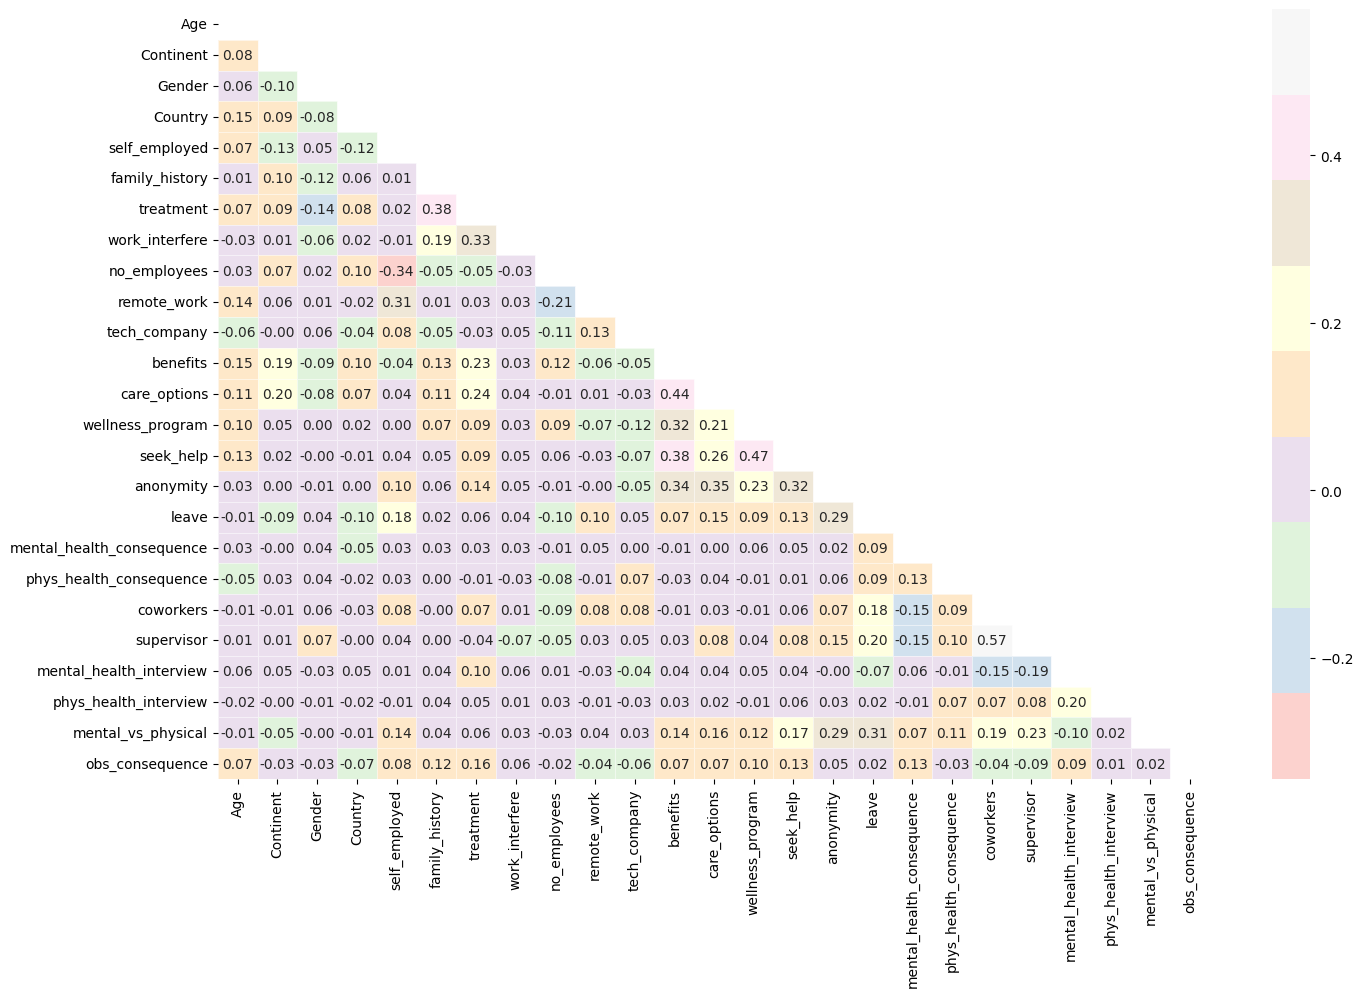

In [ ]:
df = data.copy()
cols = df.columns
encoder = LabelEncoder()
for col in cols:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

plt.figure(figsize = (16, 10), dpi = 100)

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, mask = mask , cmap = 'Pastel1', annot = True , linewidths = 0.5 , fmt = ".2f" , alpha = 0.6)


Discretization
We discretized Age to a discrete set of ages [youth, adults, seniors ]¶

In [ ]:
data['Age_cat']=pd.cut(data.Age,bins=[17,25,64,72],labels=['Youth','Adult','Senior'])
data['Age_cat'].value_counts()

Adult     1040
Youth     217 
Senior    2   
Name: Age_cat, dtype: int64

In [ ]:
data.head(10).style.applymap(lambda x : "background-color: #f5e9f2")

,Age,Continent,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
0,37,North America,Female,United States,No,No,Yes,Often,6 to 25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Adult
1,44,North America,Male,United States,No,No,No,Rarely,>1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Adult
2,32,North America,Male,Canada,Yes,No,No,Rarely,6 to 25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Adult
3,31,Europe,Male,United Kingdom,No,Yes,Yes,Often,26 to 100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Adult
4,31,North America,Male,United States,Yes,No,No,Never,100 to 500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Adult
5,33,North America,Male,United States,No,Yes,No,Sometimes,6 to 25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,Adult
6,35,North America,Female,United States,No,Yes,Yes,Sometimes,1 to 5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,Adult
7,39,North America,Male,Canada,No,No,No,Never,1 to 5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,Adult
8,42,North America,Female,United States,Yes,Yes,Yes,Sometimes,100 to 500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,Adult
9,23,North America,Male,Canada,No,No,No,Never,26 to 100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Youth


In [ ]:
x=data['Age_cat'].value_counts().index
print(x)
y=data['Age_cat'].value_counts().values.tolist()
print(y)

CategoricalIndex(['Adult', 'Youth', 'Senior'], categories=['Youth', 'Adult', 'Senior'], ordered=True, dtype='category')
[1040, 217, 2]


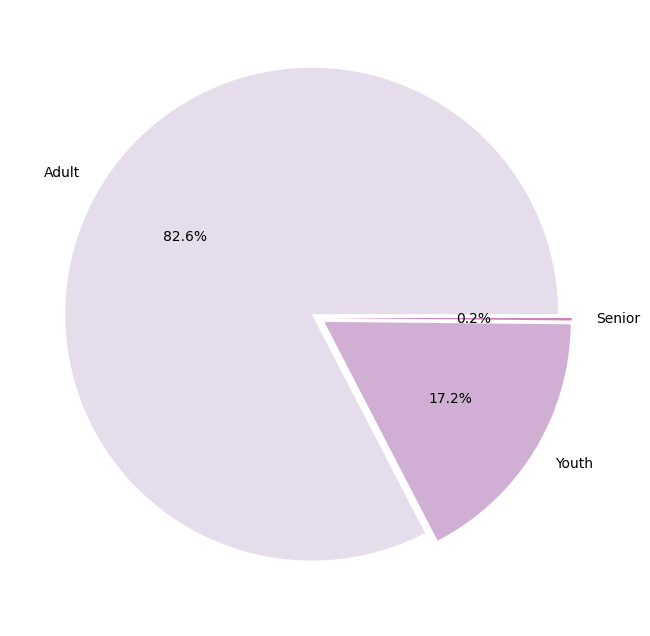

In [ ]:
plt.figure(figsize=(8,8))
pal = sns.color_palette("PuRd")
#explode needs a length to function so making a for loop makes it more dynamic
plt.pie(y, labels=x, colors=pal,autopct='%1.1f%%',
        explode=[0.03 for i in data['Age_cat'].value_counts().index])
plt.show()

**Exploring Target Variable**

In [ ]:
#drop age column and work with age category
data = data.drop(columns=['Age'])

In [ ]:
#drop Continenet and obs_consequence columns for better prediction
data = data.drop(columns=['Continent','obs_consequence'])

In [ ]:
#from sklearn import preprocessing
encoded_data=data.apply(LabelEncoder().fit_transform)
encoded_data.head().style.applymap(lambda x : "background-color: #f5e9f2")

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,Age_cat
0,0,45,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,1,45,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,1,7,1,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,1,44,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,0
4,1,45,1,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [ ]:
df['treatment'].value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [ ]:
df = encoded_data.copy()

X = df.drop(['treatment'], axis=1)
y = df['treatment']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1007, 22)
y_train dataset:  (1007,)
X_test dataset:  (252, 22)
y_test dataset:  (252,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)


print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

Before OverSampling, counts of label '1': 519
Before OverSampling, counts of label '0': 488 

After OverSampling, the shape of train_X: (1274, 22)
After OverSampling, the shape of train_y: (1274,) 

After OverSampling, counts of label '1': 637
After OverSampling, counts of label '0': 637


*save each of these sets into separated files*

In [ ]:
np.savetxt('X_train.txt', X_train)
np.savetxt('X_test.txt', X_test)
np.savetxt('y_train.txt', y_train)
np.savetxt('y_test.txt', y_test)

**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



tree_params= param_dist={
   "criterion":['gini', 'entropy', 'log_loss'],
   "max_depth":[0,7,8,9,10,12,None],
    'splitter':['best', 'random'],
    #'max_features':[4,5,'auto', 'sqrt', 'log2'],
    'random_state':[4,5,6,7,8,9,None],
    #'max_leaf_nodes':[5,6,7,8,9,None]
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 3)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Training set score: {round(tree_grid.score(X_train, y_train) * 100, 2)}%')
print ('--')
print ('Testing set Score is',best_score * 100)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Training set score: 81.73%
--
Testing set Score is 74.27801468846246
--
Best Parameters is {'criterion': 'entropy', 'max_depth': 7, 'random_state': 4, 'splitter': 'random'}
--
ROC Score is 0.7353275992916772
--
Recall Score is  0.7542372881355932
--
Confusion Matrix

 [[96 38]
 [29 89]]


**Decision Tree Using Entropy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=8, splitter ='random')

# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train_en = clf_en.predict(X_train)
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)*100))

accuracy score: 84.9057


**Confusion matrix**

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.



Confusion Matrix : 


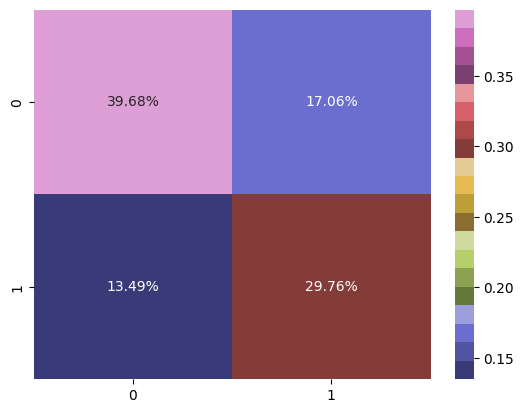

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_en, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap = 'tab20b')
plt.show()

**Classification Report**


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       134
           1       0.69      0.64      0.66       118

    accuracy                           0.69       252
   macro avg       0.69      0.69      0.69       252
weighted avg       0.69      0.69      0.69       252



**K-Nearest Neighbors (KNN)**

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
y_pred = knn.predict(X_test)

**To classify an unknown record:**

Initialize the K value.
Calculate the distance between test input and K trained nearest neighbors.
Check class categories of nearest neighbors and determine the type in which test input falls.
Classification will be done by taking the majority of votes.
Return the class category.

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 72.61904761904762 % and k = [12]


In [ ]:
#plt.figure(figsize=(12,5))
#p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
#p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
#knn = KNeighborsClassifier(12)

#knn.fit(X_train,y_train)
#knn.score(X_test,y_test)*100

**KNN confusion matrix**

In [ ]:
#cm = confusion_matrix(y_pred, y_test)
#print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
#plt.figure(dpi=100)
#sns.heatmap(cm/np.sum(cm), annot=True,
 #           fmt='.2%', cmap = 'tab20b')
#plt.show()

**KNN classification report**

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
#from sklearn.naive_bayes import GaussianNB


# instantiate the model
#gnb = GaussianNB()


# fit the model
#gnb.fit(X_train, y_train)
#y_pred = gnb.predict(X_test)

In [ ]:
#print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
'''
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
'''

"\ny_pred_train = gnb.predict(X_train)\nprint('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))\n"

**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set
'''
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
'''

"\nprint('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))\n\nprint('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))\n"

*naive bayes confusion matrix*

Confusion Matrix : 


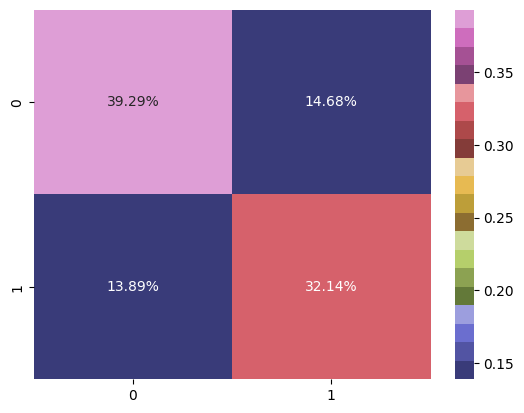

In [ ]:
cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=100)
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap = 'tab20b')
plt.show()

*naive bayes classification report*

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       134
           1       0.70      0.69      0.69       118

    accuracy                           0.71       252
   macro avg       0.71      0.71      0.71       252
weighted avg       0.71      0.71      0.71       252



In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=0.1, random_state=42)

In [ ]:

from sklearn.tree import DecisionTreeClassifier # Base Classifier for Bagging Method
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

clf_bagging = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = True, oob_score=True, n_jobs = -1)
clf_pasting = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = False, n_jobs = -1)

clf_bagging.fit(X_train, y_train)
clf_pasting.fit(X_train, y_train)

y_pred_bagging = clf_bagging.predict(X_val)
y_pred_pasting = clf_bagging.predict(X_val)


clf_bagging.oob_score_, accuracy_score(y_val, y_pred_bagging), accuracy_score(y_val, y_pred_pasting)


(0.7080504364694471, 0.7391304347826086, 0.7391304347826086)

In [ ]:
# The decision function returns the class probabilities (if base estimator has a predict_proba() method) for each training instance.
clf_bagging.oob_decision_function_[112]
#y_train[112]

array([1., 0.])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=8, splitter ='random')

# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train_en = clf_en.predict(X_train)
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)*100))

accuracy score: 85.0630


In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd

# Load your own dataset using pandas

#data_path = "survey.csv"  # Update with your dataset's path

#loaded_data = pd.read_csv(data_path)
X = X_train
y = y_train

# Assuming the last column is the target variable



In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7225806451612903
